In [1]:
import sys
import os
import json
from visualization import *

In [2]:
sys.path.append('Markov/')

In [3]:
from markovchain import *

In [4]:
data_path="Data/dataset.json"

In [5]:
with open(data_path, "r") as f:
    training_data=json.load(f)
print(len(training_data))
'''lenlist=[]
maxlen=0
imax=0
minlen=len(training_data[0].split(", "))
imin=0
for i in range(len(training_data)):
    melody=training_data[i].split(", ")
    lenlist.append(len(melody))
    if maxlen<len(melody):
        maxlen=len(melody)
        imax=i
    if minlen>len(melody):
        minlen=len(melody)
        imin=i
print(max(lenlist))
print(imax)
print(min(lenlist))
print(imin)
'''

435


'lenlist=[]\nmaxlen=0\nimax=0\nminlen=len(training_data[0].split(", "))\nimin=0\nfor i in range(len(training_data)):\n    melody=training_data[i].split(", ")\n    lenlist.append(len(melody))\n    if maxlen<len(melody):\n        maxlen=len(melody)\n        imax=i\n    if minlen>len(melody):\n        minlen=len(melody)\n        imin=i\nprint(max(lenlist))\nprint(imax)\nprint(min(lenlist))\nprint(imin)\n'

In [6]:
states=extract_states(training_data)
model=MarkovChainMelodyGenerator(states)
model.train(training_data)

In [7]:
generated_melody = model.generate(16,mode="measure")
print(generated_melody)

['A#5-2.0', 'A#5-0.25', 'A#5-0.25', 'A#4-0.5', 'B4-0.5', 'A4-0.25', 'C5-0.25', 'D5-0.25', 'B-4-0.5', 'D4-0.25', 'F4-0.25', 'E-4-0.25', 'C4-0.25', 'B-3-0.5', 'A3-0.5', 'A5-0.5', 'E5-0.5', 'F5-0.25', 'G5-0.25', 'F#5-0.5', 'G5-2.0', 'B4-1.0', 'rest-0.25', 'E4-0.5', 'G4-0.5', 'A4-0.25', 'G4-0.25', 'F#4-0.25', 'F#4-0.25', 'B4-0.25', 'C#5-0.25', 'C5-0.25', 'E-5-0.25', 'D5-0.25', 'E-5-0.25', 'D5-0.25', 'F4-0.25', 'F4-1.0', 'G4-1.0', 'B-4-0.5', 'A4-0.5', 'C5-0.5', 'rest-0.25', 'B3-0.25', 'D4-0.25', 'E4-0.25', 'F4-0.25', 'F4-0.25', 'E4-0.25', 'E4-0.25', 'D4-0.5', 'D5-0.25', 'F5-0.25', 'A5-1.0', 'A5-0.25', 'G5-0.25', 'D6-0.25', 'D6-0.25', 'F6-0.25', 'E6-0.125', 'E-6-0.125', 'D6-0.125', 'C6-0.125', 'D6-0.125', 'C6-0.125', 'G6-0.125', 'F6-0.125', 'E6-0.125', 'B5-0.125', 'D6-0.125', 'C6-0.125', 'B-5-0.125', 'A5-0.125', 'B5-0.125', 'B-5-0.125', 'A5-0.125', 'G5-0.125', 'F#5-0.25', 'D5-0.25', 'D-5-0.5', 'C5-0.5', 'E5-0.5', 'G#4-0.25', 'A4-0.25', 'B4-0.25', 'C5-0.25', 'C5-0.25', 'C5-1.0', 'rest-0.25', 

In [8]:
generated_melody2 = model.generate(20,starting_sequence=[("A5-0.25"), ("F5-0.5"), ("D5-0.5"), ("A4-0.5")])
print(generated_melody2)

['A5-0.25', 'F5-0.5', 'D5-0.5', 'A4-0.5', 'C5-0.25', 'E5-0.25', 'F5-0.25', 'G5-0.25', 'A5-0.25', 'G5-0.25', 'G5-1.0', 'F5-1.0', 'rest-0.25', 'D-5-0.25', 'C5-1.0', 'rest-1.0', 'rest-0.25', 'F#4-0.25', 'C#4-0.25', 'D4-0.25']


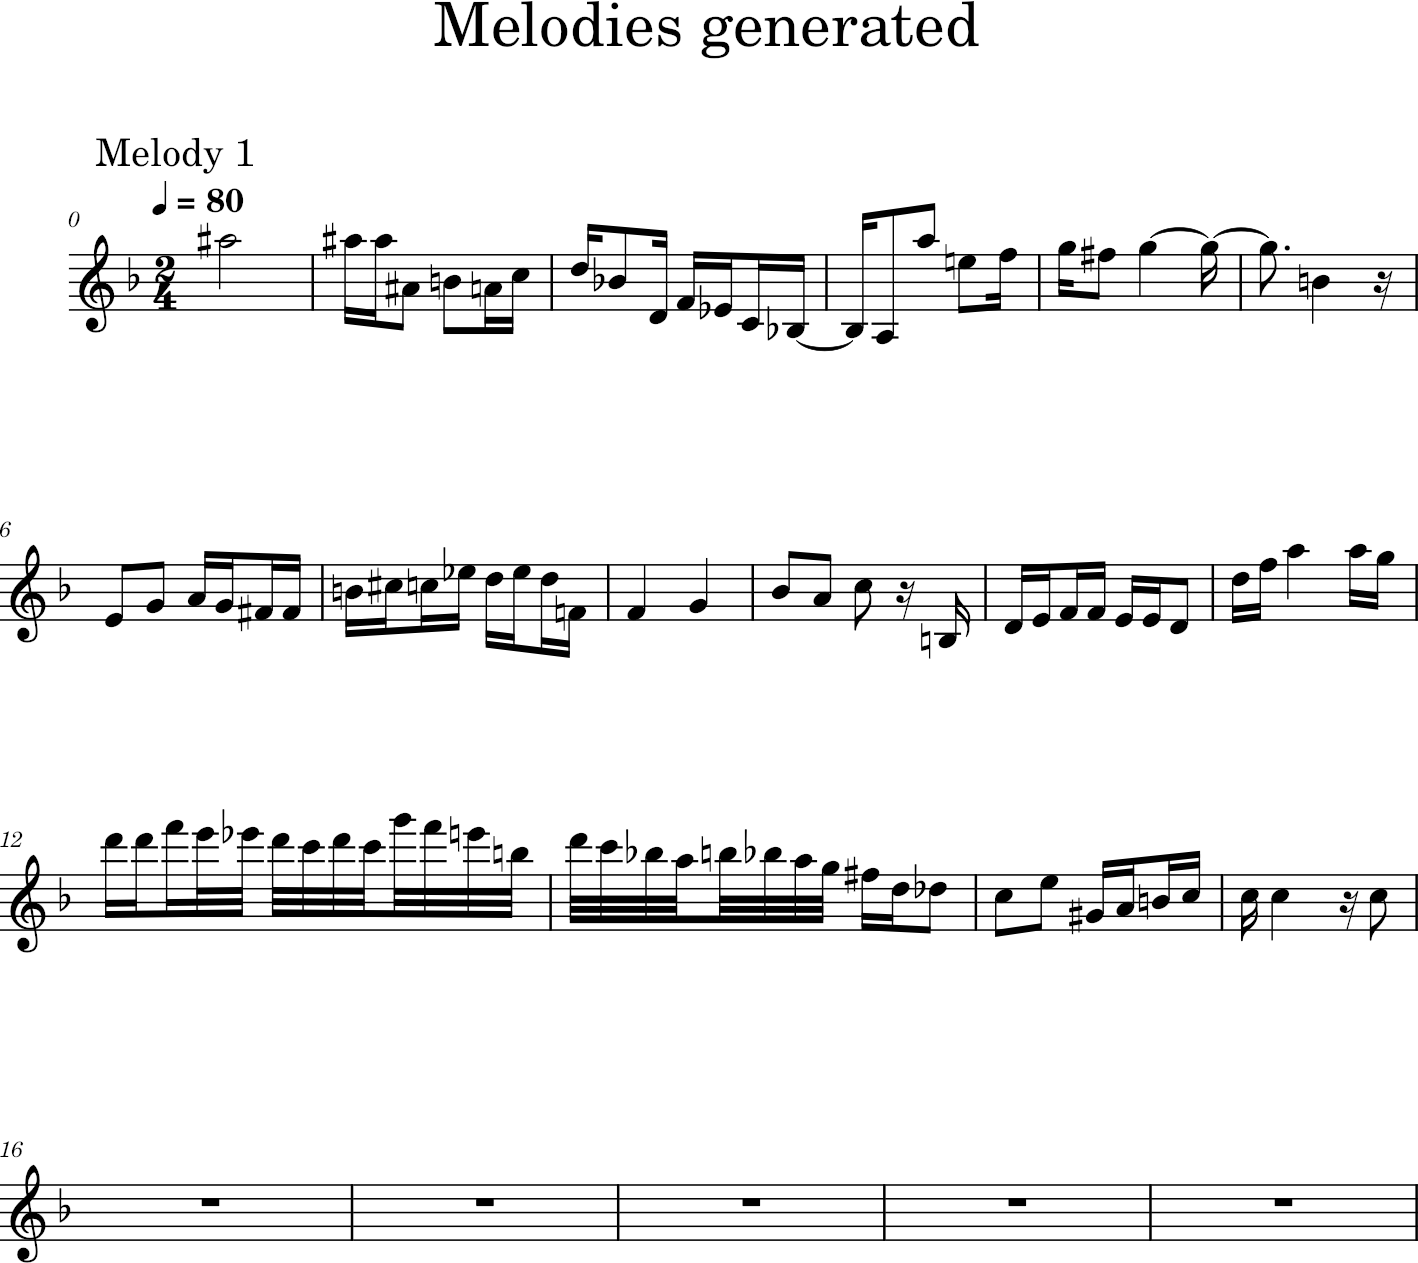

In [9]:
visualize("2/4",["F"],[generated_melody]).show()

In [11]:
#Folk (Windows)
music21.environment.set('musescoreDirectPNGPath',str(os.path.join("C:\\", "Program Files","MuseScore 4","bin","MuseScore4.exe")))
music21.environment.set('musicxmlPath', str(os.path.join("C:\\", "Program Files","MuseScore 4","bin","MuseScore4.exe")))
visualize("2/4",["E"],[generated_melody]).show("musicxml")

In [7]:
title="Markov_1"
part="All"
key="F"
generated_melodies=[model.generate(16,mode="measure") for _ in range(40)]
generated_to_json(title,generated_melodies,key=key,part=part)